In [1]:
# A/B Testing General Assembly : Step 1 --> Upload of data and check data accuracy.
# Upload of data base via csv file.
path2Tableau = r"C:\Users\guillaume_julie\Desktop\Data Analytics - A_B Test.csv"
import pandas as pd
import numpy as np
from scipy import stats as st
import scipy.stats as scs
import matplotlib.pyplot as plt
data = pd.read_csv(path2Tableau) 
# header = data.head(0) 
df_data = pd.DataFrame(data,columns=['user_id','timestamp', 'Experiment Group', 'landing_page', 'Sign Up'])
print(df_data.info())
print(df_data.pivot_table(values='Sign Up', index=['Experiment Group','landing_page'], aggfunc=np.sum))
# It looks like some users from treatment group landed on the old page. We need to clean up the data to compare apples with apples. 
#It looks like some users from treatment group landed on the old page. We need to check, using a loop, that users landed on the good pages
#df_data['concatenation'] = df_data[['Experiment Group', 'landing_page']].apply(lambda x: ''.join(x), axis=1)
dummy = []
for i, row in df_data.iterrows():
    if ((row['Experiment Group'] == 'treatment' and row['landing_page'] == 'new_page') or
        (row['Experiment Group'] == 'control' and row['landing_page'] == 'old_page')):
        dummy.append(1)
    else:
        dummy.append(0)
dummy = pd.DataFrame(dummy)
df_data['dummy_1'] = dummy
df_data.head(130)
df_data_cleaned = df_data.drop(df_data.query('dummy_1 == 0').index)
df_data_cleaned 
# One is going to use the data frame df_data_cleaned for the rest of the development.
# For checking --> print(df_data_cleaned.loc[df_data['dummy_1'] == 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7538 entries, 0 to 7537
Data columns (total 5 columns):
user_id             7538 non-null int64
timestamp           7538 non-null object
Experiment Group    7538 non-null object
landing_page        7538 non-null object
Sign Up             7538 non-null int64
dtypes: int64(2), object(3)
memory usage: 294.5+ KB
None
                               Sign Up
Experiment Group landing_page         
control          new_page            8
                 old_page          407
treatment        new_page          604
                 old_page            5


,user_id,timestamp,Experiment Group,landing_page,Sign Up,dummy_1
0,898458,1/24/2017 0:00:06,treatment,new_page,0,1
1,919802,1/24/2017 0:00:09,control,old_page,0,1
2,635490,1/24/2017 0:00:10,control,old_page,0,1
3,751774,1/24/2017 0:00:17,treatment,new_page,0,1
4,789808,1/24/2017 0:00:22,control,old_page,0,1
5,775448,1/24/2017 0:00:22,treatment,new_page,0,1
6,922516,1/24/2017 0:00:27,control,old_page,0,1
7,848540,1/24/2017 0:00:30,control,old_page,0,1
8,897304,1/24/2017 0:00:45,control,old_page,0,1
9,844828,1/24/2017 0:00:47,control,old_page,0,1


In [2]:
# A/B Testing General Assembly : Step 2 --> Calculation of conversion rate using pivot. 
ab_summary = df_data_cleaned.pivot_table(values='Sign Up', index='Experiment Group', aggfunc=np.sum)
# Add additional columns to the pivot table
ab_summary['total'] = df_data_cleaned.pivot_table(values='Sign Up', index='Experiment Group', aggfunc=lambda x: len(x))
ab_summary['rate'] = df_data_cleaned.pivot_table(values='Sign Up', index='Experiment Group')
print (ab_summary)
# The conversion rate of group treatment is 5.56% higher in absolute than the control group. The new page generated a relative growth of 51% in conversions. The gap or growth of conventions is a good start, but they do not represent certain pieces of evidence. At this point, we have not measured how confident we are in this result. It can be mitigated by looking at the distributions.

                  Sign Up  total      rate
Experiment Group                          
control               407   3754  0.108418
treatment             604   3681  0.164086


In [36]:
def plot_binom_dist_groups (ax, dist_1, dist_2, label = None)
    """plot binomil distribution of two samples
    Example:
    plot_binom_dist_groups(ax, sample 1, sample 2) # plot 2 standard normal distribution
    Parameters: 
        ax (matplotlib axes)
        dist_1 (float): normal distribution sample 1
        dist_2 (float): normal distribution sample 2
    Returns:
        The function adds 2 plots to the axes object provided
        """
    x = np.linspace((p*n)-100, (p*n)+100, n+1, dtype = int)
    y = plot_binom_dist(ax, n, p, label=None)
    ax.plot(x,y, label = lable)

def plot_binom_dist(ax, n, p, label=None):

    """Adds a binomial distribution
    Example:
        plot_norm_dist(ax, 0, 1)  # plots a standard normal distribution
    Parameters:
        ax (matplotlib axes)
        n (float): population of the sample
        p (float): convertion rate of the population 
    Returns:
        The function adds a plot to the axes object provided
    """
    x = np.linspace((p*n)-100, (p*n)+100, n+1, dtype = int)
    y = scs.binom(n, p).pmf(x)
    ax.plot(x, y, label=label)

SyntaxError: invalid syntax (<ipython-input-36-d540798ce09c>, line 1)

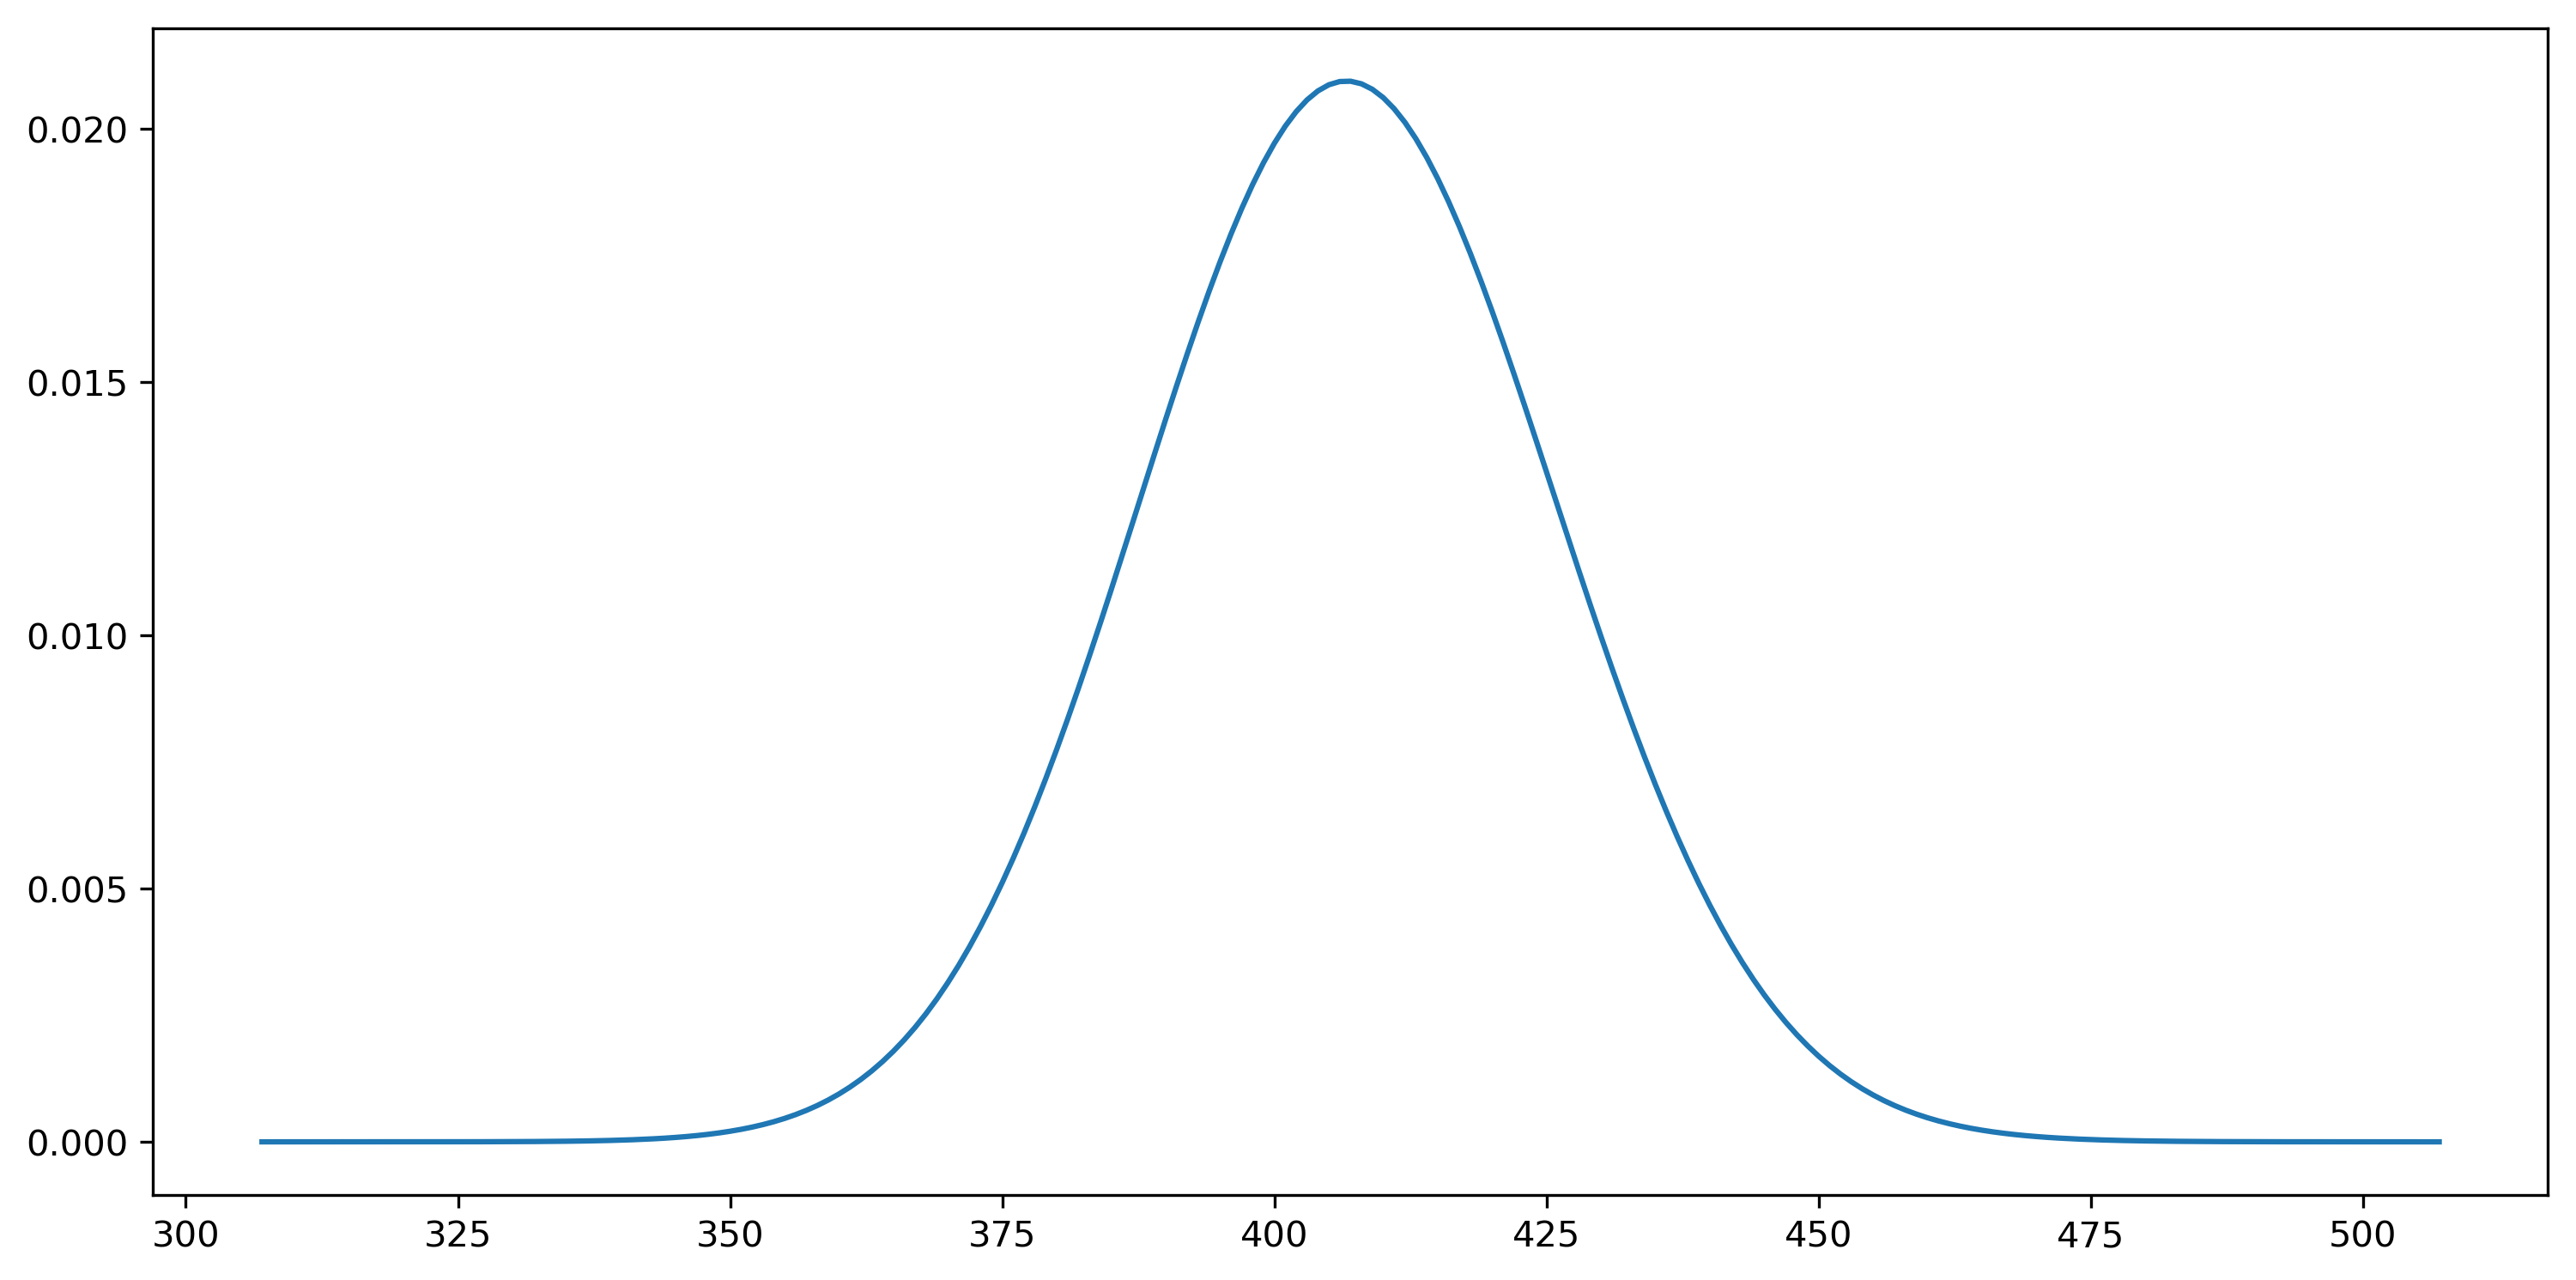

In [35]:
fig, plot_samples = plt.subplots(figsize=(12,6), dpi=300)
control_total = df_data_cleaned['user_id'].loc[df_data_cleaned['Experiment Group']=='control'].count()
control_converted = df_data_cleaned['Sign Up'].loc[df_data_cleaned['Experiment Group']=='control'].sum()
cr_control = control_converted/control_total
plot_binom_dist(plot_samples, control_total, cr_control, label=None)

treatment_total = df_data_cleaned['user_id'].loc[df_data_cleaned['Experiment Group']=='treatment'].count()
cr_treatment = treatment_converted/treatment_total